In [48]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
%matplotlib inline
import ta
from ta.utils import dropna

sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 200
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
close = pd.read_csv(r'price_history.csv', index_col=0, names=['', 'close'], skiprows=8759) 
close.index = pd.to_datetime(close.index)
close

,close
,
2018-06-20 14:00:00+00:00,4673.6
2018-06-20 15:00:00+00:00,4646.8
2018-06-20 16:00:00+00:00,4658.5
2018-06-20 17:00:00+00:00,4644.1
2018-06-20 18:00:00+00:00,4655.0
...,...
2018-11-25 19:00:00+00:00,979.0
2018-11-25 20:00:00+00:00,1018.7
2018-11-25 21:00:00+00:00,1047.0


In [3]:
#close = prices['close']
#print(close.index)
#close.index = close.index.astype(str)
#print(close.index)
#close

In [50]:
close.describe()

,close
count,3802.000000
mean,2577.700316
std,965.689151
min,916.000000
25%,1794.925000
50%,2064.300000
75%,3707.875000
max,4719.300000


In [51]:
short_rolling = close.rolling(window=20).mean()
short_rolling

,close
,
2018-06-20 14:00:00+00:00,NaN
2018-06-20 15:00:00+00:00,NaN
2018-06-20 16:00:00+00:00,NaN
2018-06-20 17:00:00+00:00,NaN
2018-06-20 18:00:00+00:00,NaN
...,...
2018-11-25 19:00:00+00:00,963.560
2018-11-25 20:00:00+00:00,964.475
2018-11-25 21:00:00+00:00,967.340


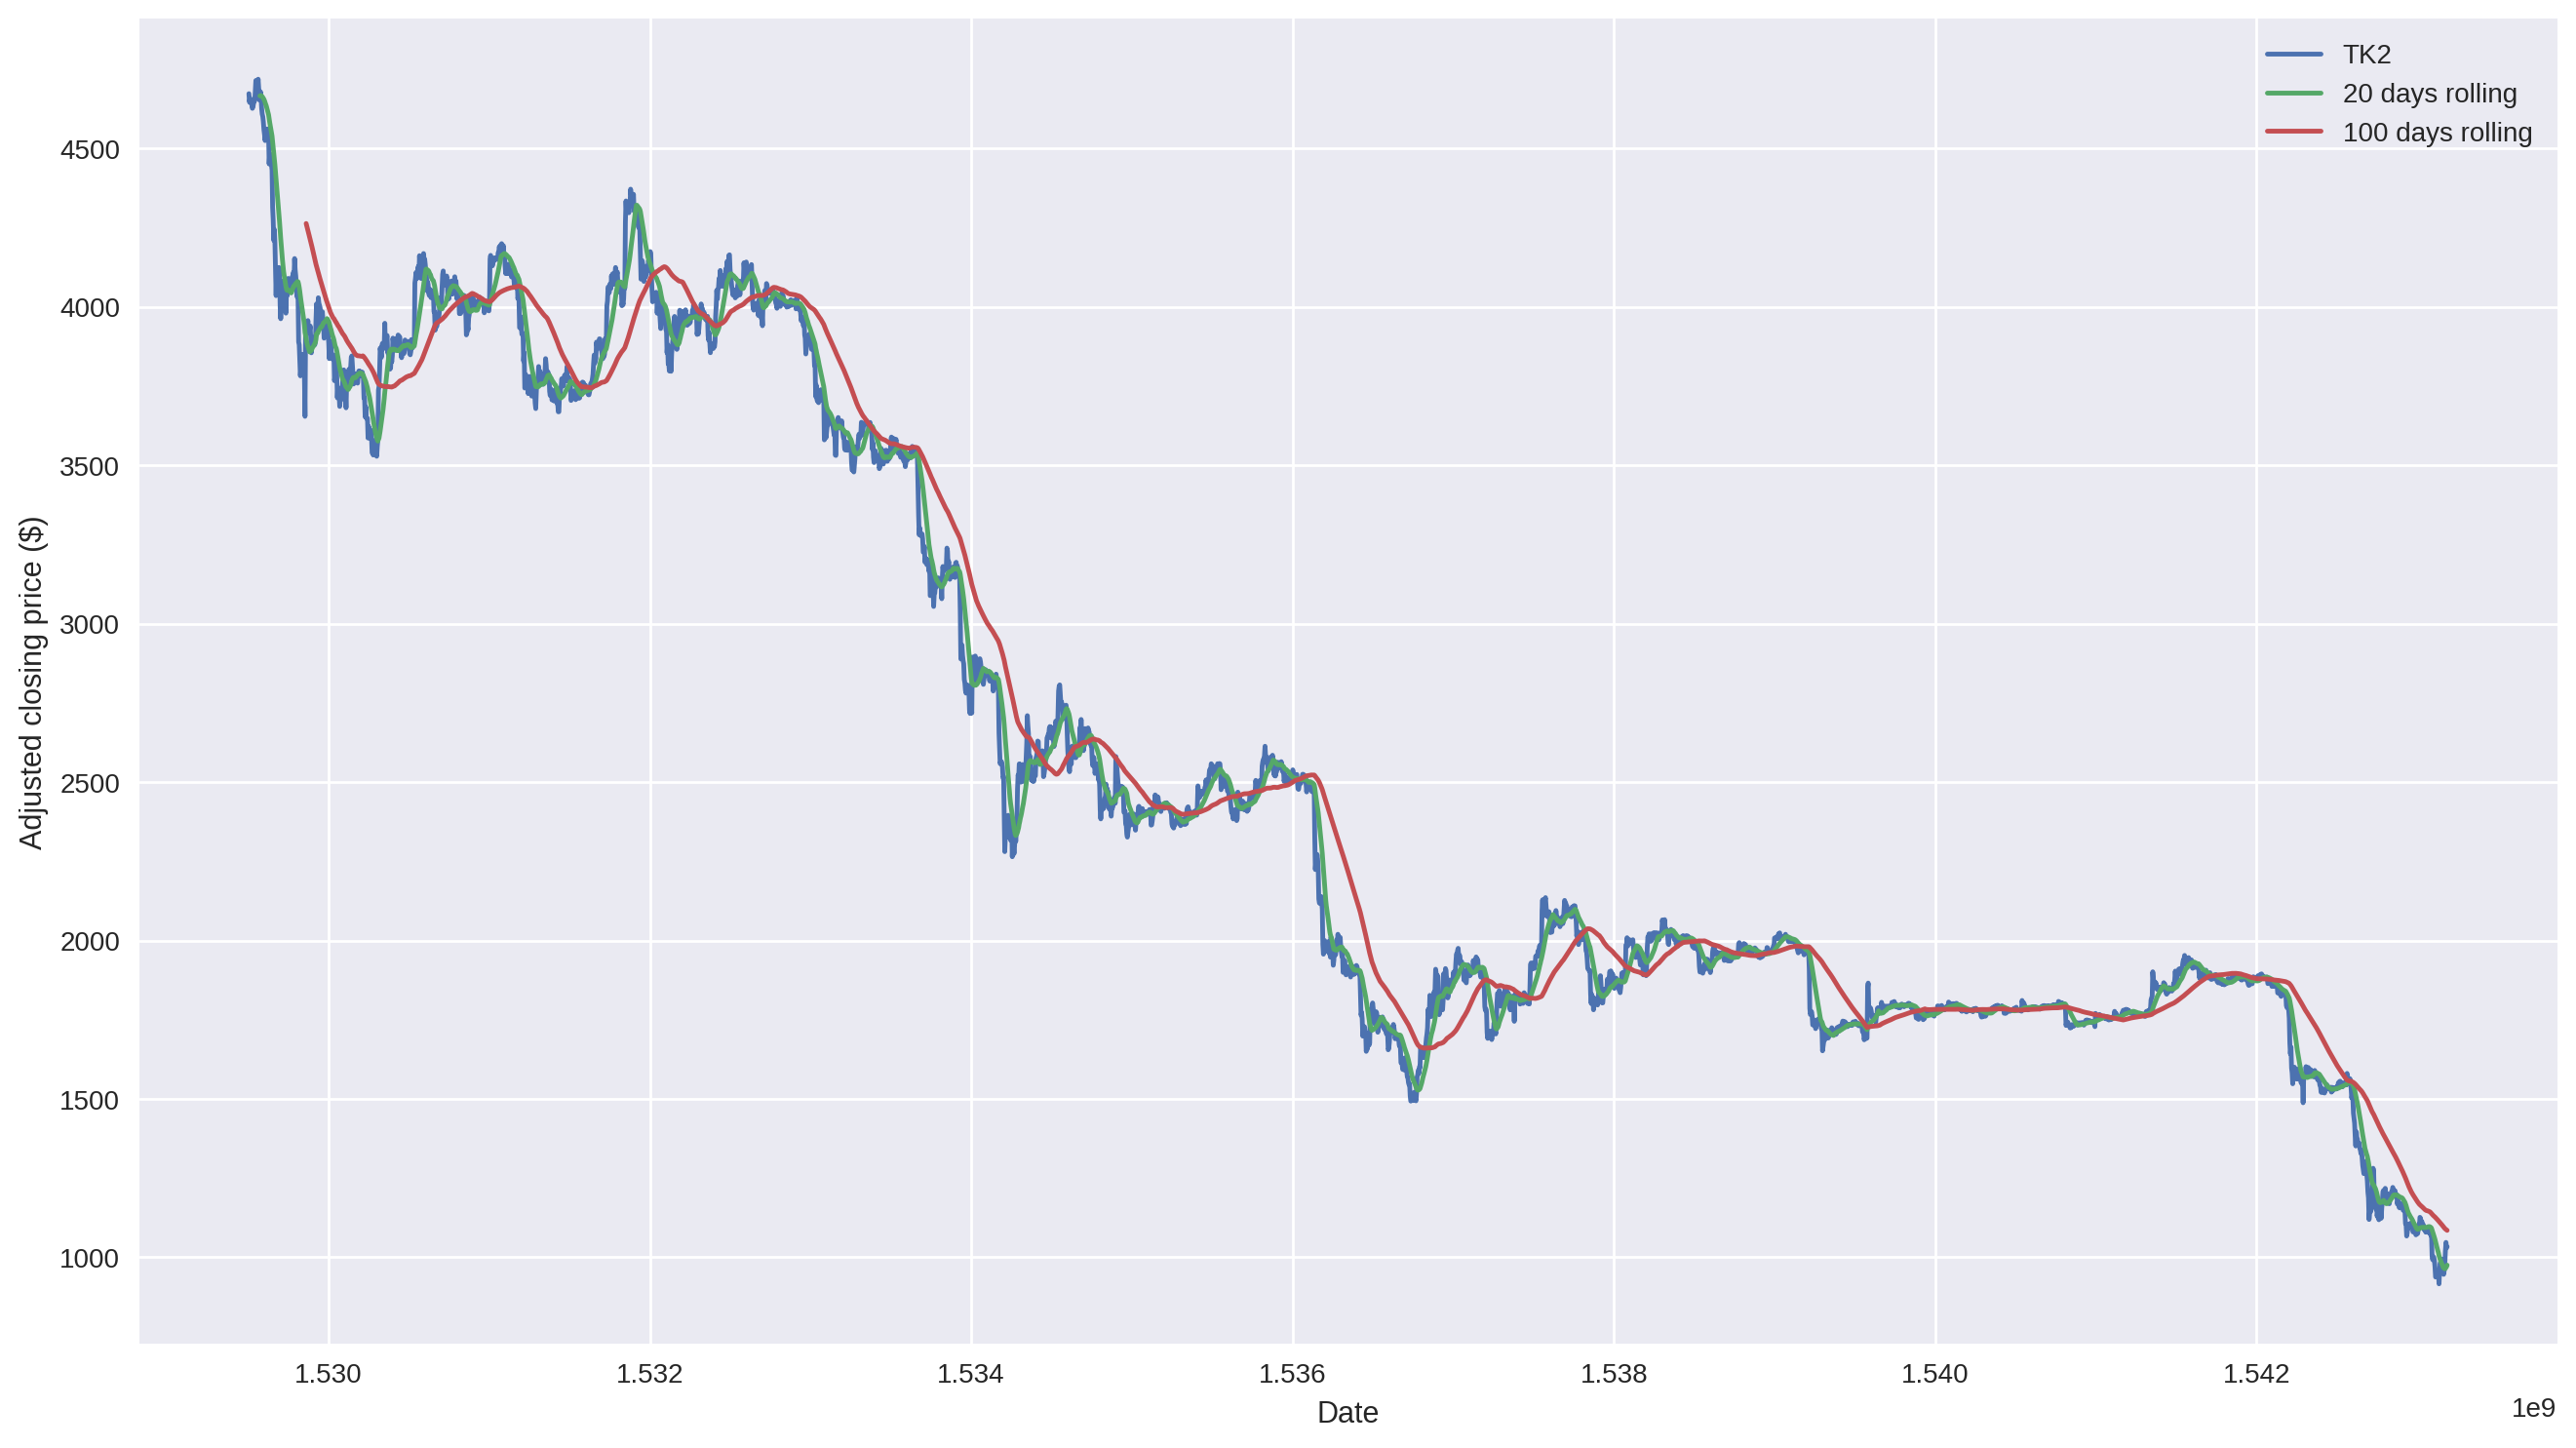

In [52]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling = close.rolling(window=20).mean()
long_rolling = close.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot((prices.index.astype(np.int64) // 10**9), prices, label='TK2')
ax.plot((short_rolling.index.astype(np.int64) // 10**9), short_rolling, label='20 days rolling')
ax.plot((long_rolling.index.astype(np.int64) // 10**9), long_rolling, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [53]:
# Relative returns
returns = close.pct_change(1)
returns.tail()

,close
,
2018-11-25 19:00:00+00:00,0.022027
2018-11-25 20:00:00+00:00,0.040552
2018-11-25 21:00:00+00:00,0.027781
2018-11-25 22:00:00+00:00,-0.016905
2018-11-25 23:00:00+00:00,0.003886


In [54]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(close).diff()
print(type(log_returns))
log_returns.head()

<class 'pandas.core.frame.DataFrame'>


,close
,
2018-06-20 14:00:00+00:00,NaN
2018-06-20 15:00:00+00:00,-0.005751
2018-06-20 16:00:00+00:00,0.002515
2018-06-20 17:00:00+00:00,-0.003096
2018-06-20 18:00:00+00:00,0.002344


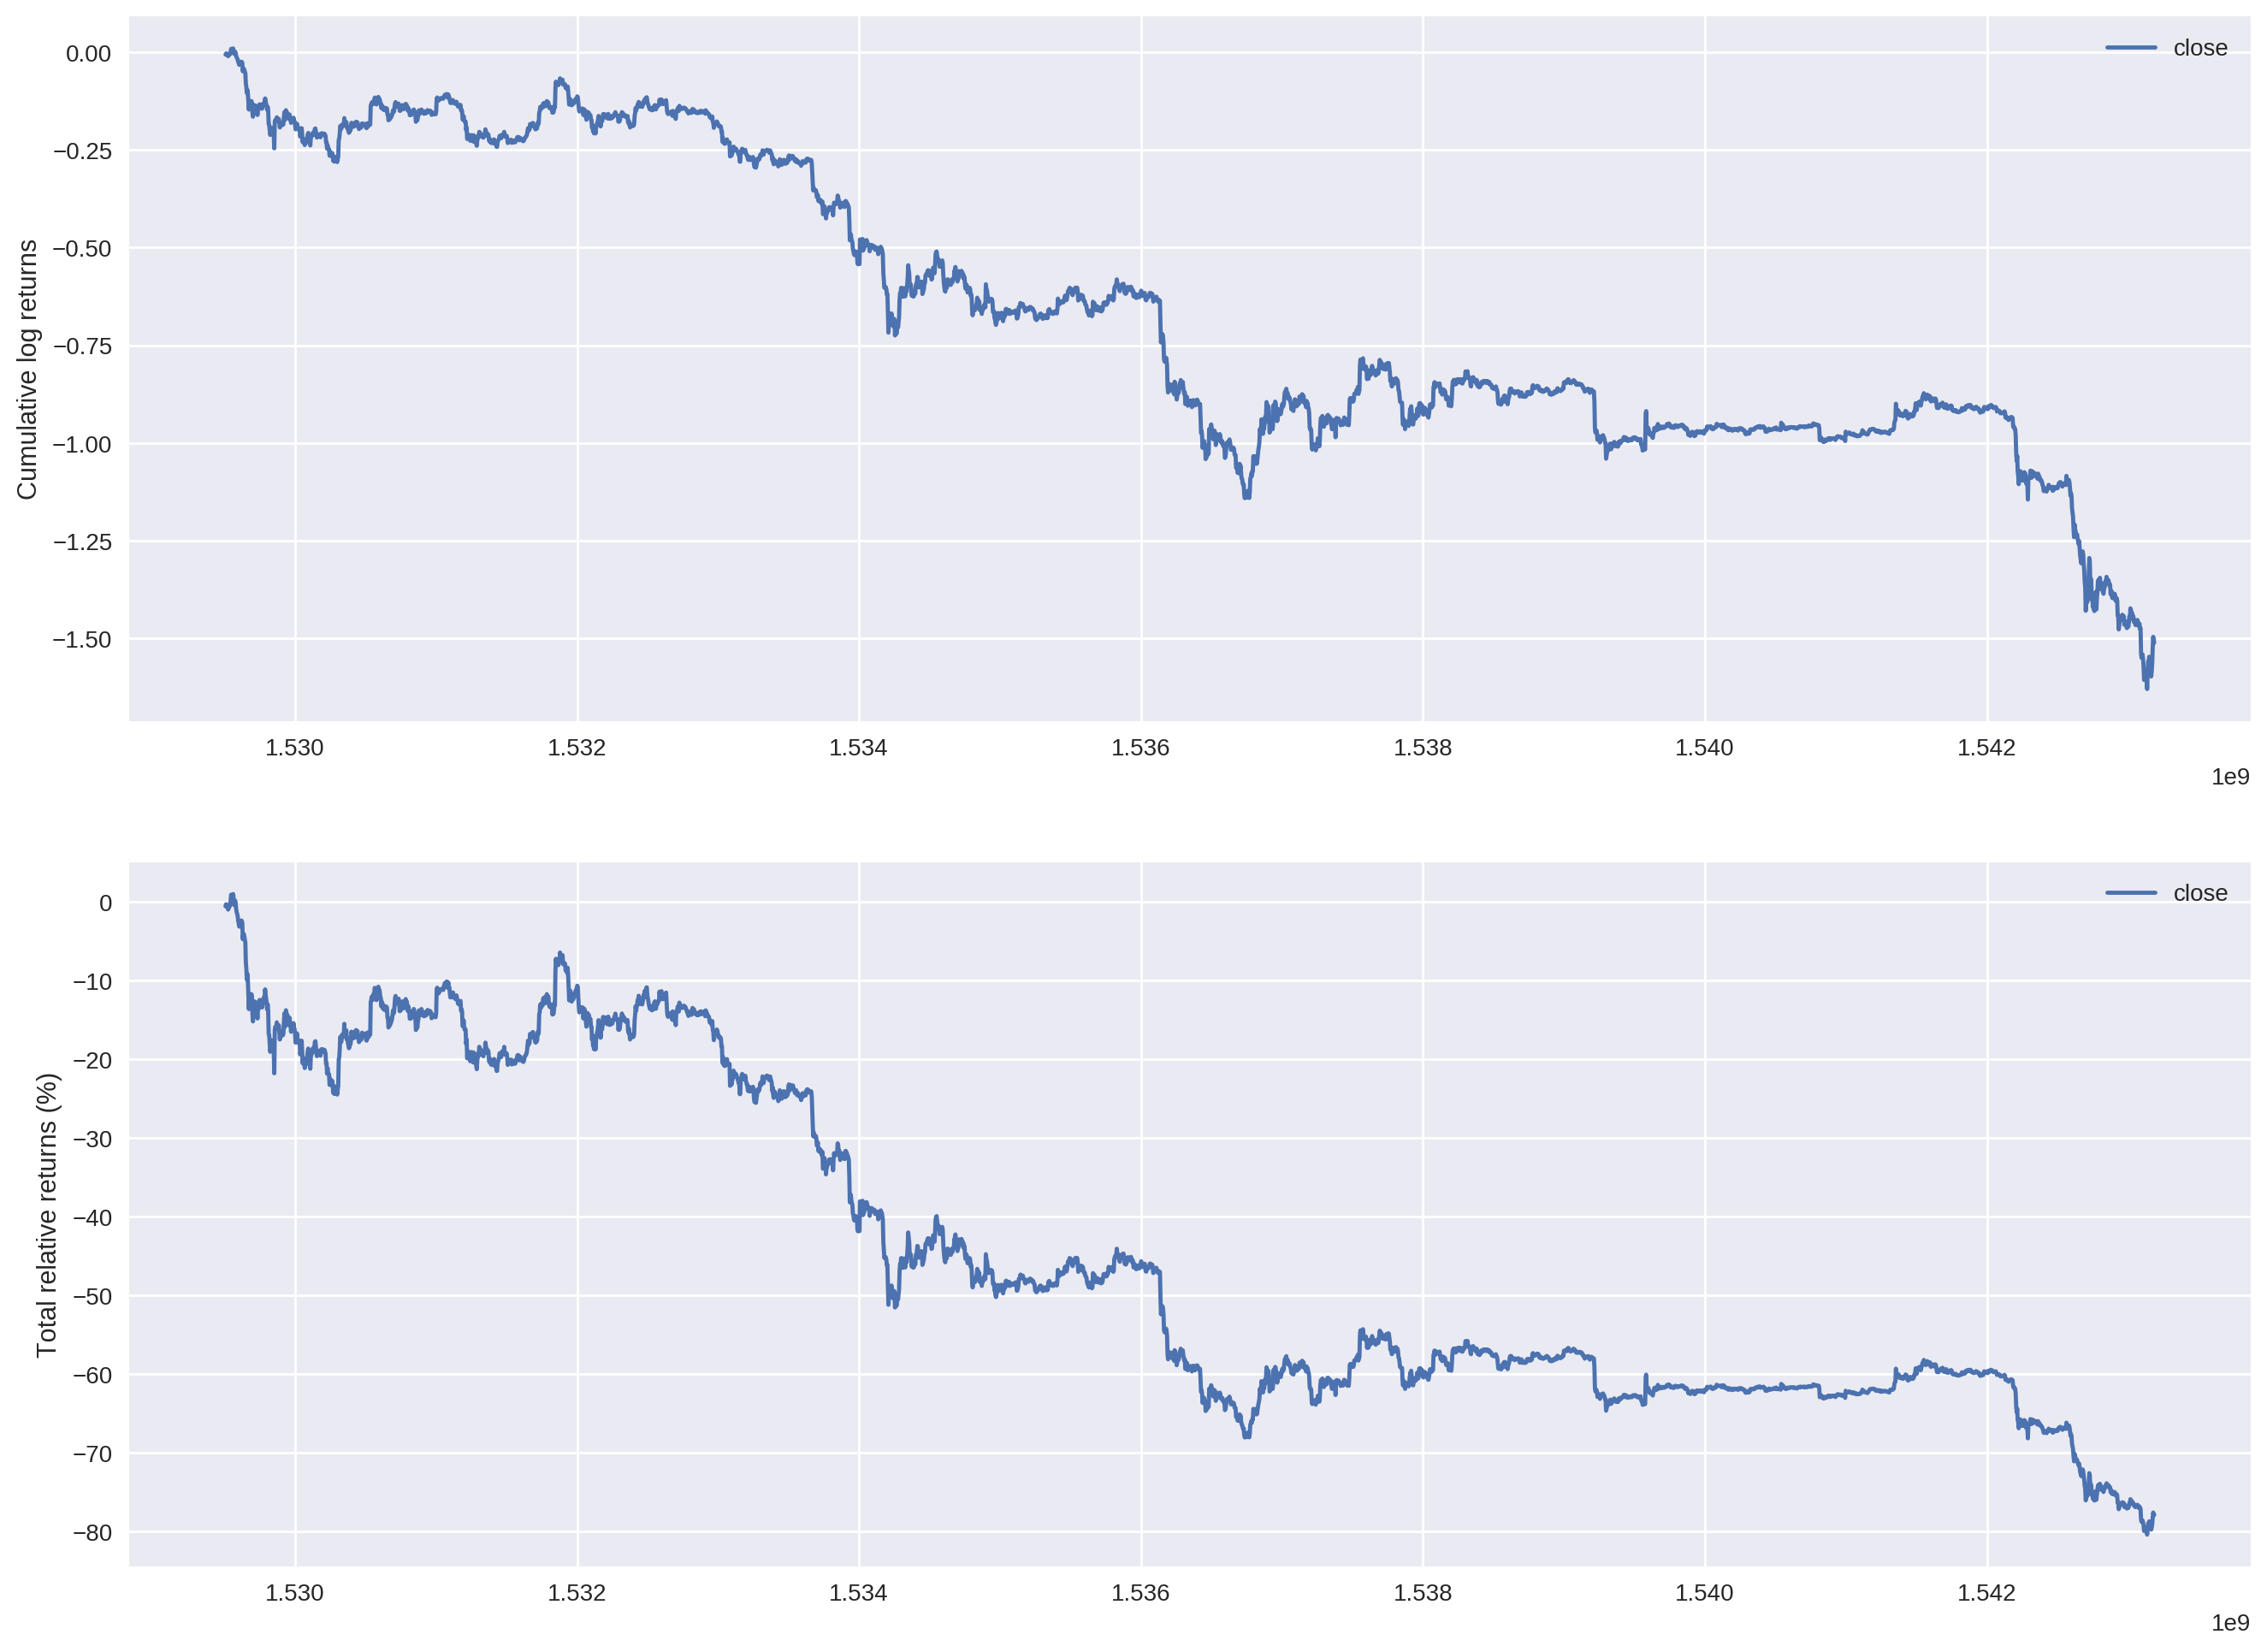

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index.astype(np.int64) // 10**9, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index.astype(np.int64) // 10**9, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [56]:
ema_short = close.ewm(span=20, adjust=False).mean()
ema_short

,close
,
2018-06-20 14:00:00+00:00,4673.600000
2018-06-20 15:00:00+00:00,4671.047619
2018-06-20 16:00:00+00:00,4669.852608
2018-06-20 17:00:00+00:00,4667.399978
2018-06-20 18:00:00+00:00,4666.219028
...,...
2018-11-25 19:00:00+00:00,978.857663
2018-11-25 20:00:00+00:00,982.652171
2018-11-25 21:00:00+00:00,988.780536


Text(0, 0.5, 'Price in $')

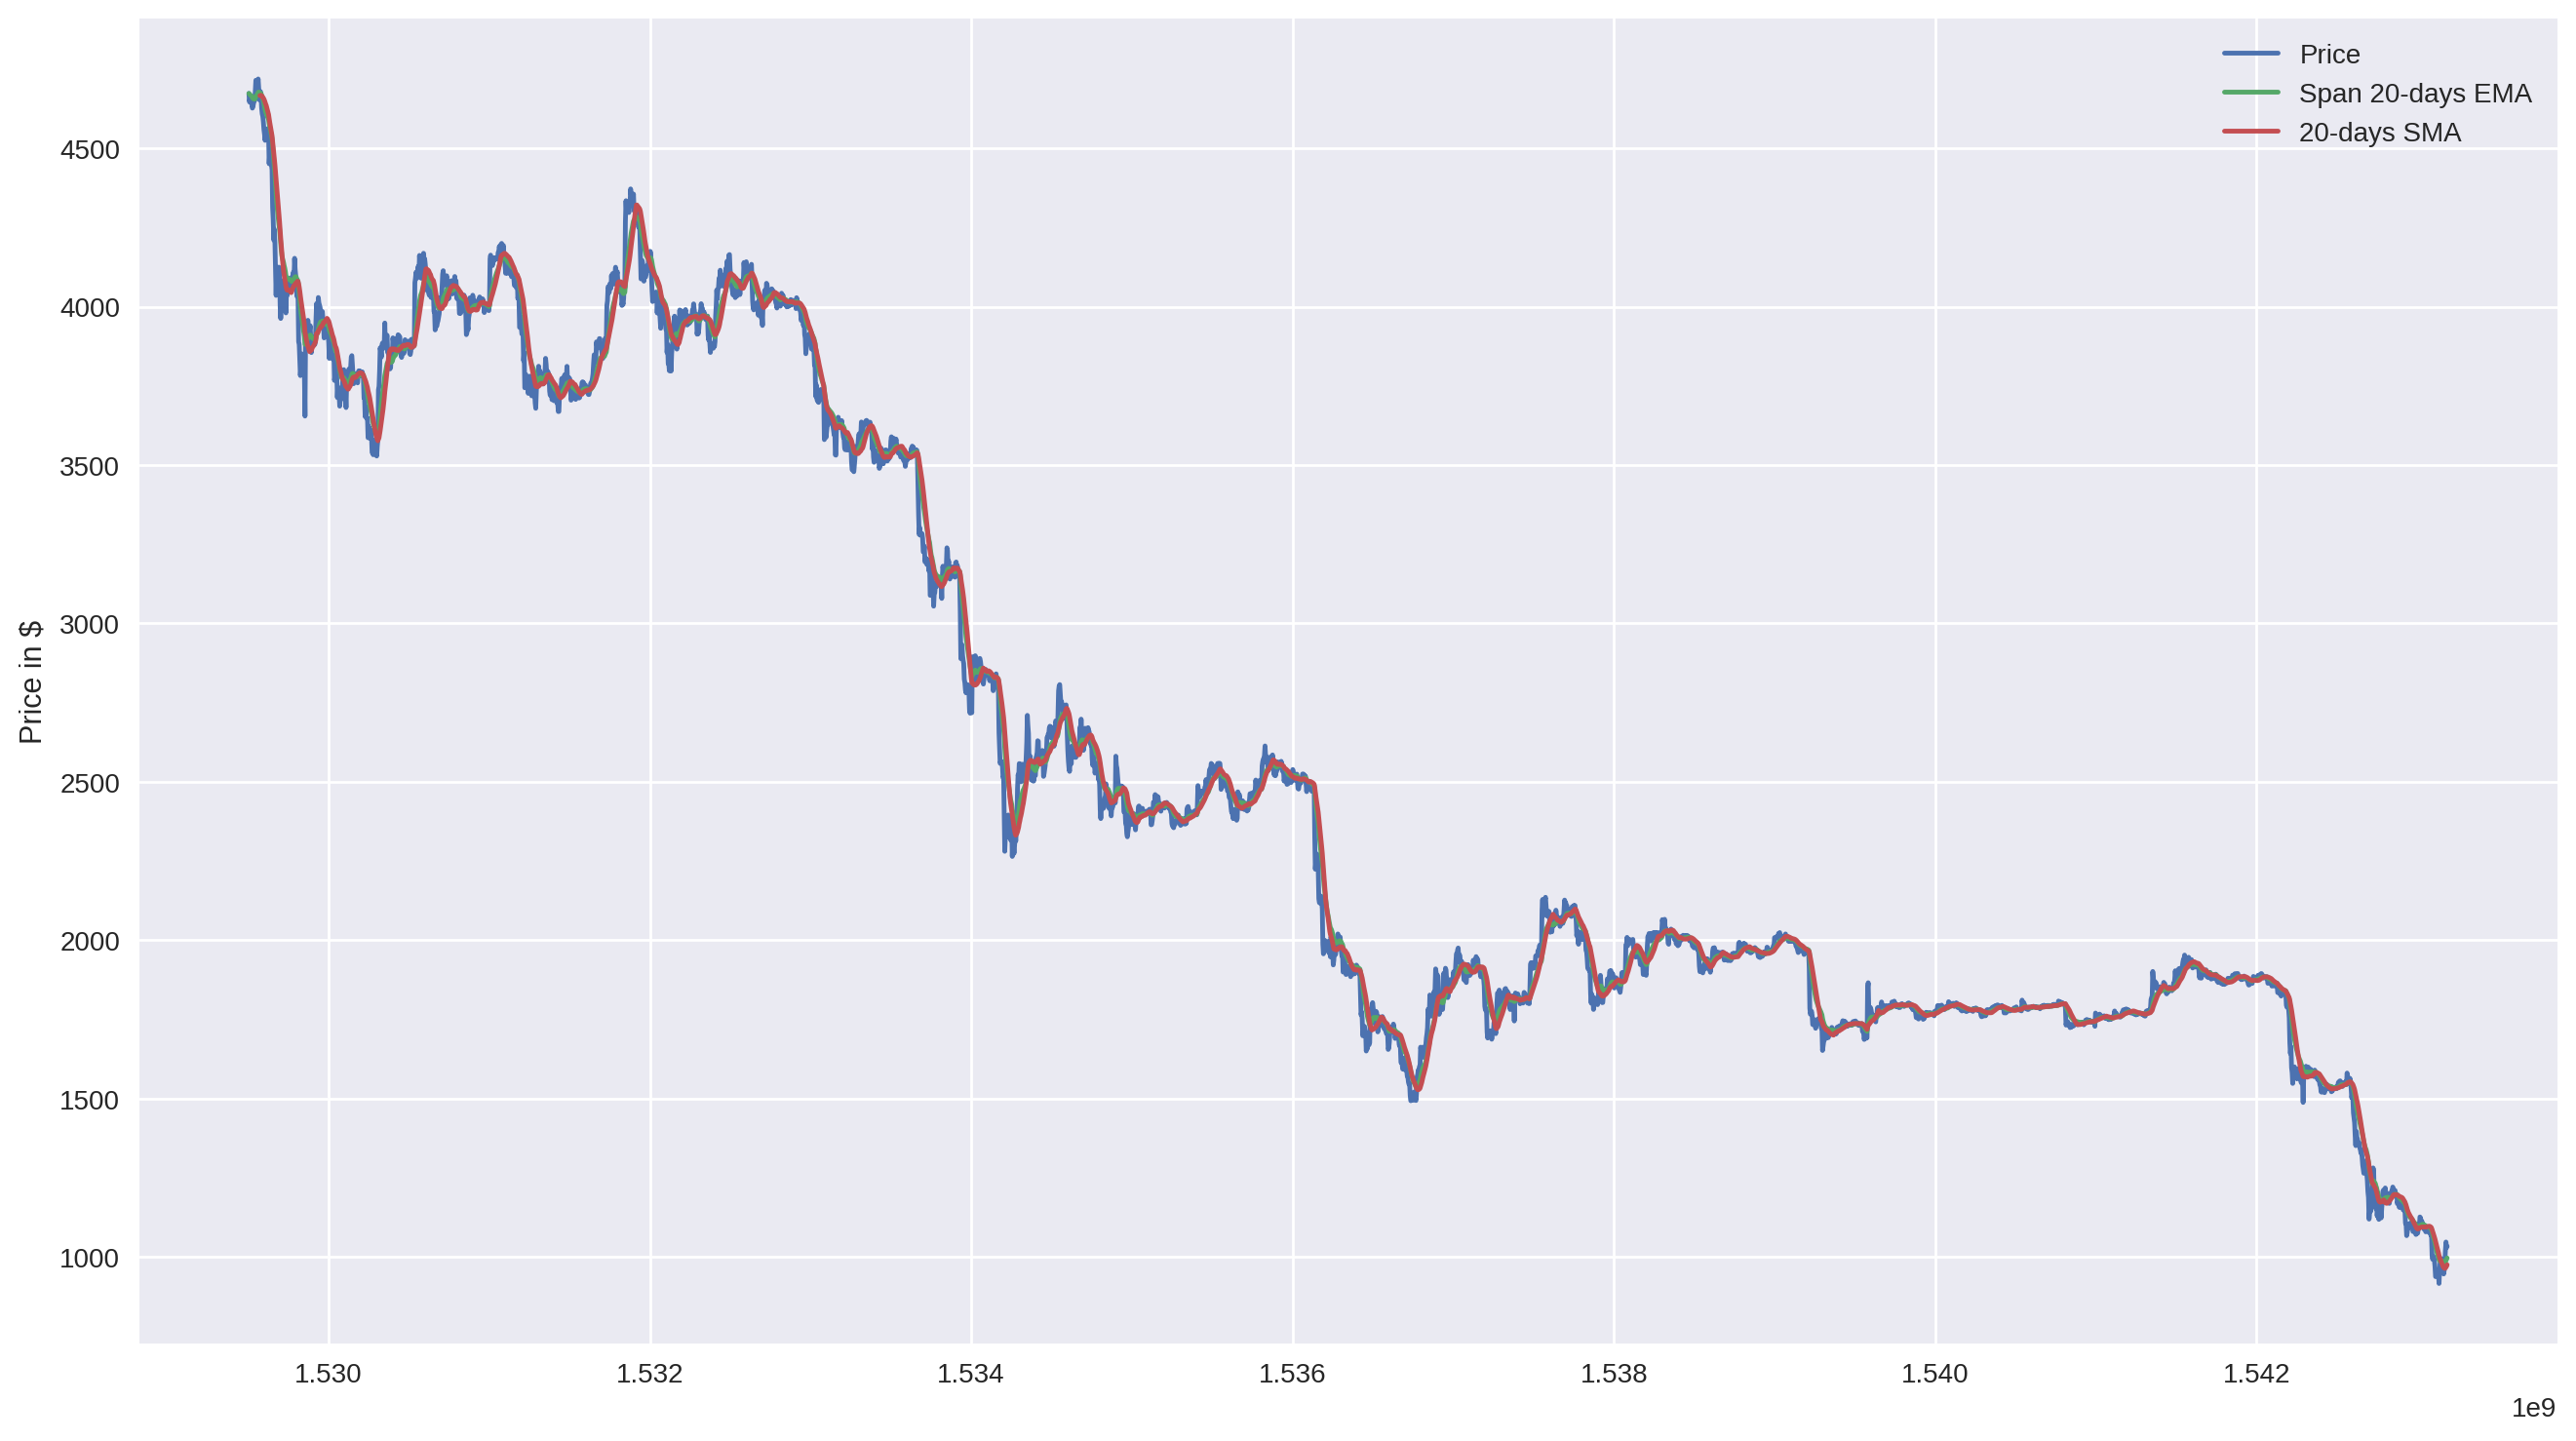

In [68]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = close.ewm(span=20, adjust=False).mean()

start_date = '2018-06-20 14:00:00+00:00'
end_date = '2018-11-25 23:00:00+00:00'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.loc[start_date:end_date, :].index.astype(np.int64) // 10**9, close.loc[start_date:end_date, 'close'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index.astype(np.int64) // 10**9, ema_short.loc[start_date:end_date, 'close'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index.astype(np.int64) // 10**9, short_rolling.loc[start_date:end_date, 'close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

Text(0, 0.5, 'Price in $')

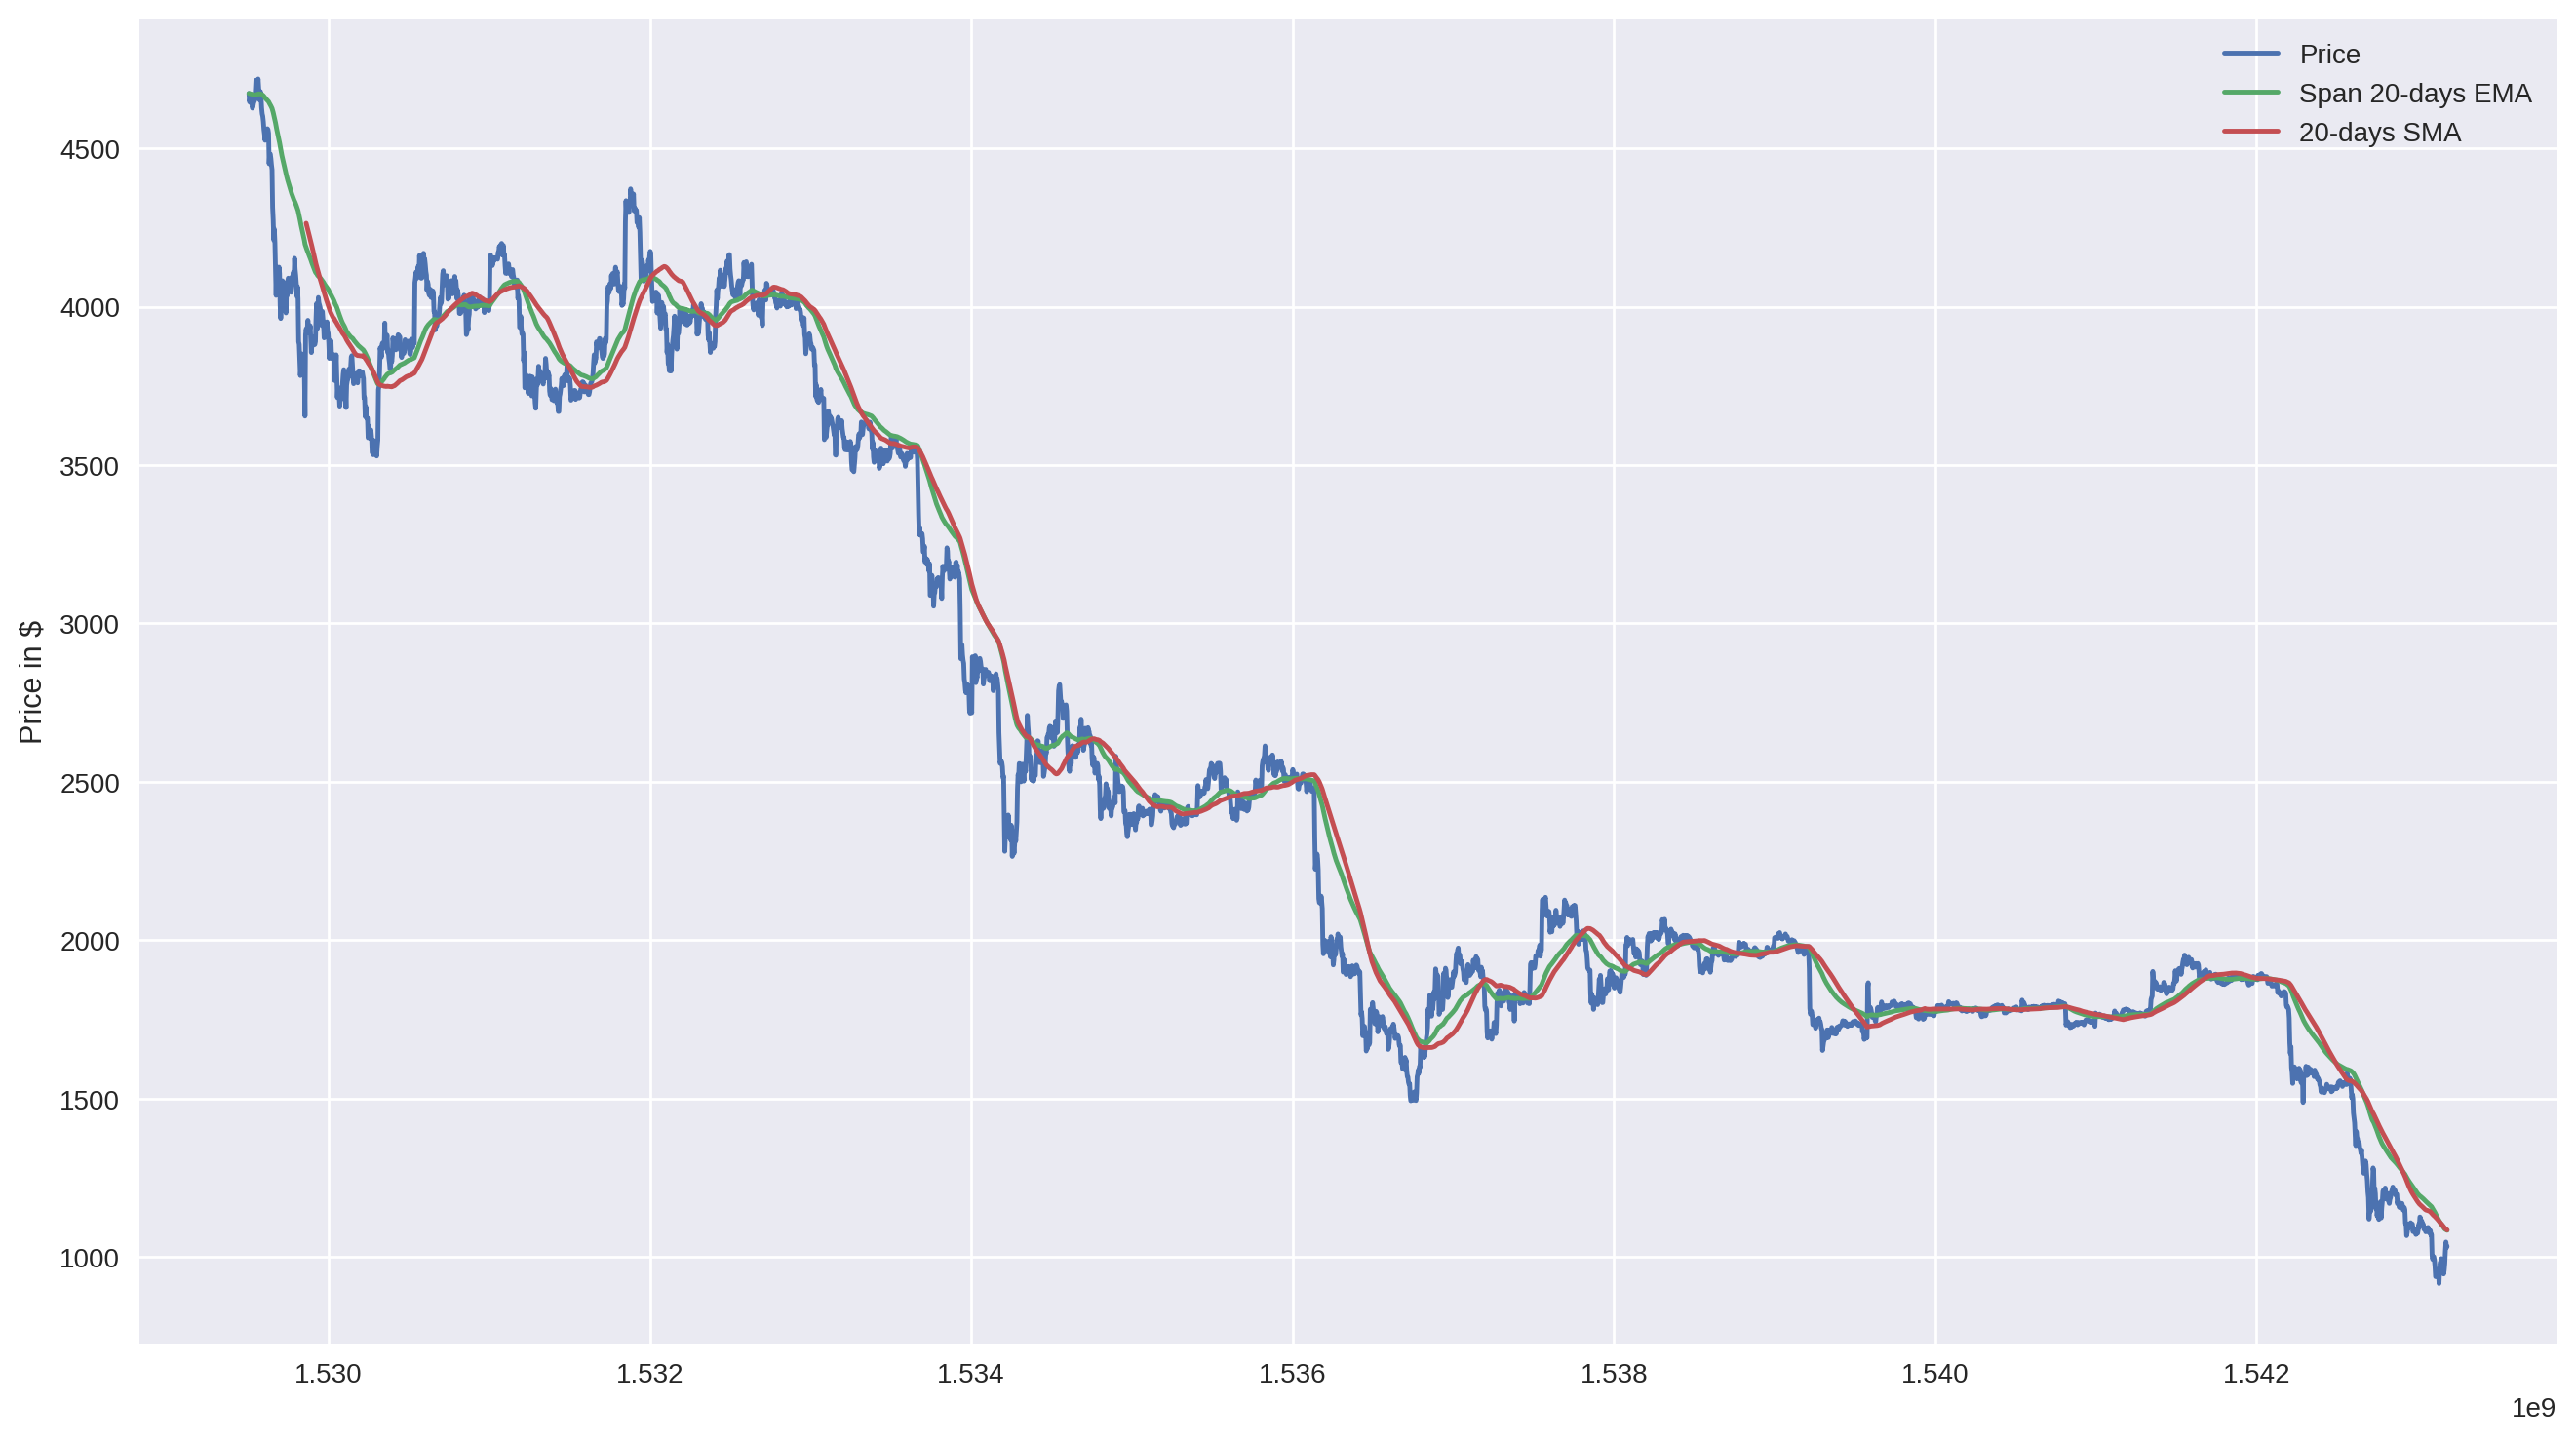

In [69]:
# Using Pandas to calculate a 100-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_long = close.ewm(span=100, adjust=False).mean()

start_date = '2018-06-20 14:00:00+00:00'
end_date = '2018-11-25 23:00:00+00:00'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.loc[start_date:end_date, :].index.astype(np.int64) // 10**9, close.loc[start_date:end_date, 'close'], label='Price')
ax.plot(ema_long.loc[start_date:end_date, :].index.astype(np.int64) // 10**9, ema_long.loc[start_date:end_date, 'close'], label = 'Span 20-days EMA')
ax.plot(long_rolling.loc[start_date:end_date, :].index.astype(np.int64) // 10**9, long_rolling.loc[start_date:end_date, 'close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

In [70]:
# Moving average trading strategy: 
# First one: taking advantage of the lag between the price and ema series: 
# - When the price timeseries p(t) crosses the EMA timeseries e(t) from below, we will close any existing short position and go long (buy) one unit of the asset.
# - When the price timeseries p(t) crosses the EMA timeseries e(t) from above, we will close any existing long position and go short (sell) one unit of the asset.
#
# Taking the difference between the prices and the EMA timeseries

trading_positions_raw = close - ema_short
trading_positions_raw.tail()

,close
,
2018-11-25 19:00:00+00:00,0.142337
2018-11-25 20:00:00+00:00,36.047829
2018-11-25 21:00:00+00:00,58.219464
2018-11-25 22:00:00+00:00,36.660468
2018-11-25 23:00:00+00:00,36.788042


In [71]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/4
trading_positions = trading_positions_raw.apply(np.sign)
trading_positions.tail()

,close
,
2018-11-25 19:00:00+00:00,1.0
2018-11-25 20:00:00+00:00,1.0
2018-11-25 21:00:00+00:00,1.0
2018-11-25 22:00:00+00:00,1.0
2018-11-25 23:00:00+00:00,1.0


In [72]:
# One final caveat
# We don't really now the behaviour on the first day, so we shift of one day and assume we traded at the close of the first day
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

Text(0, 0.5, 'Trading position')

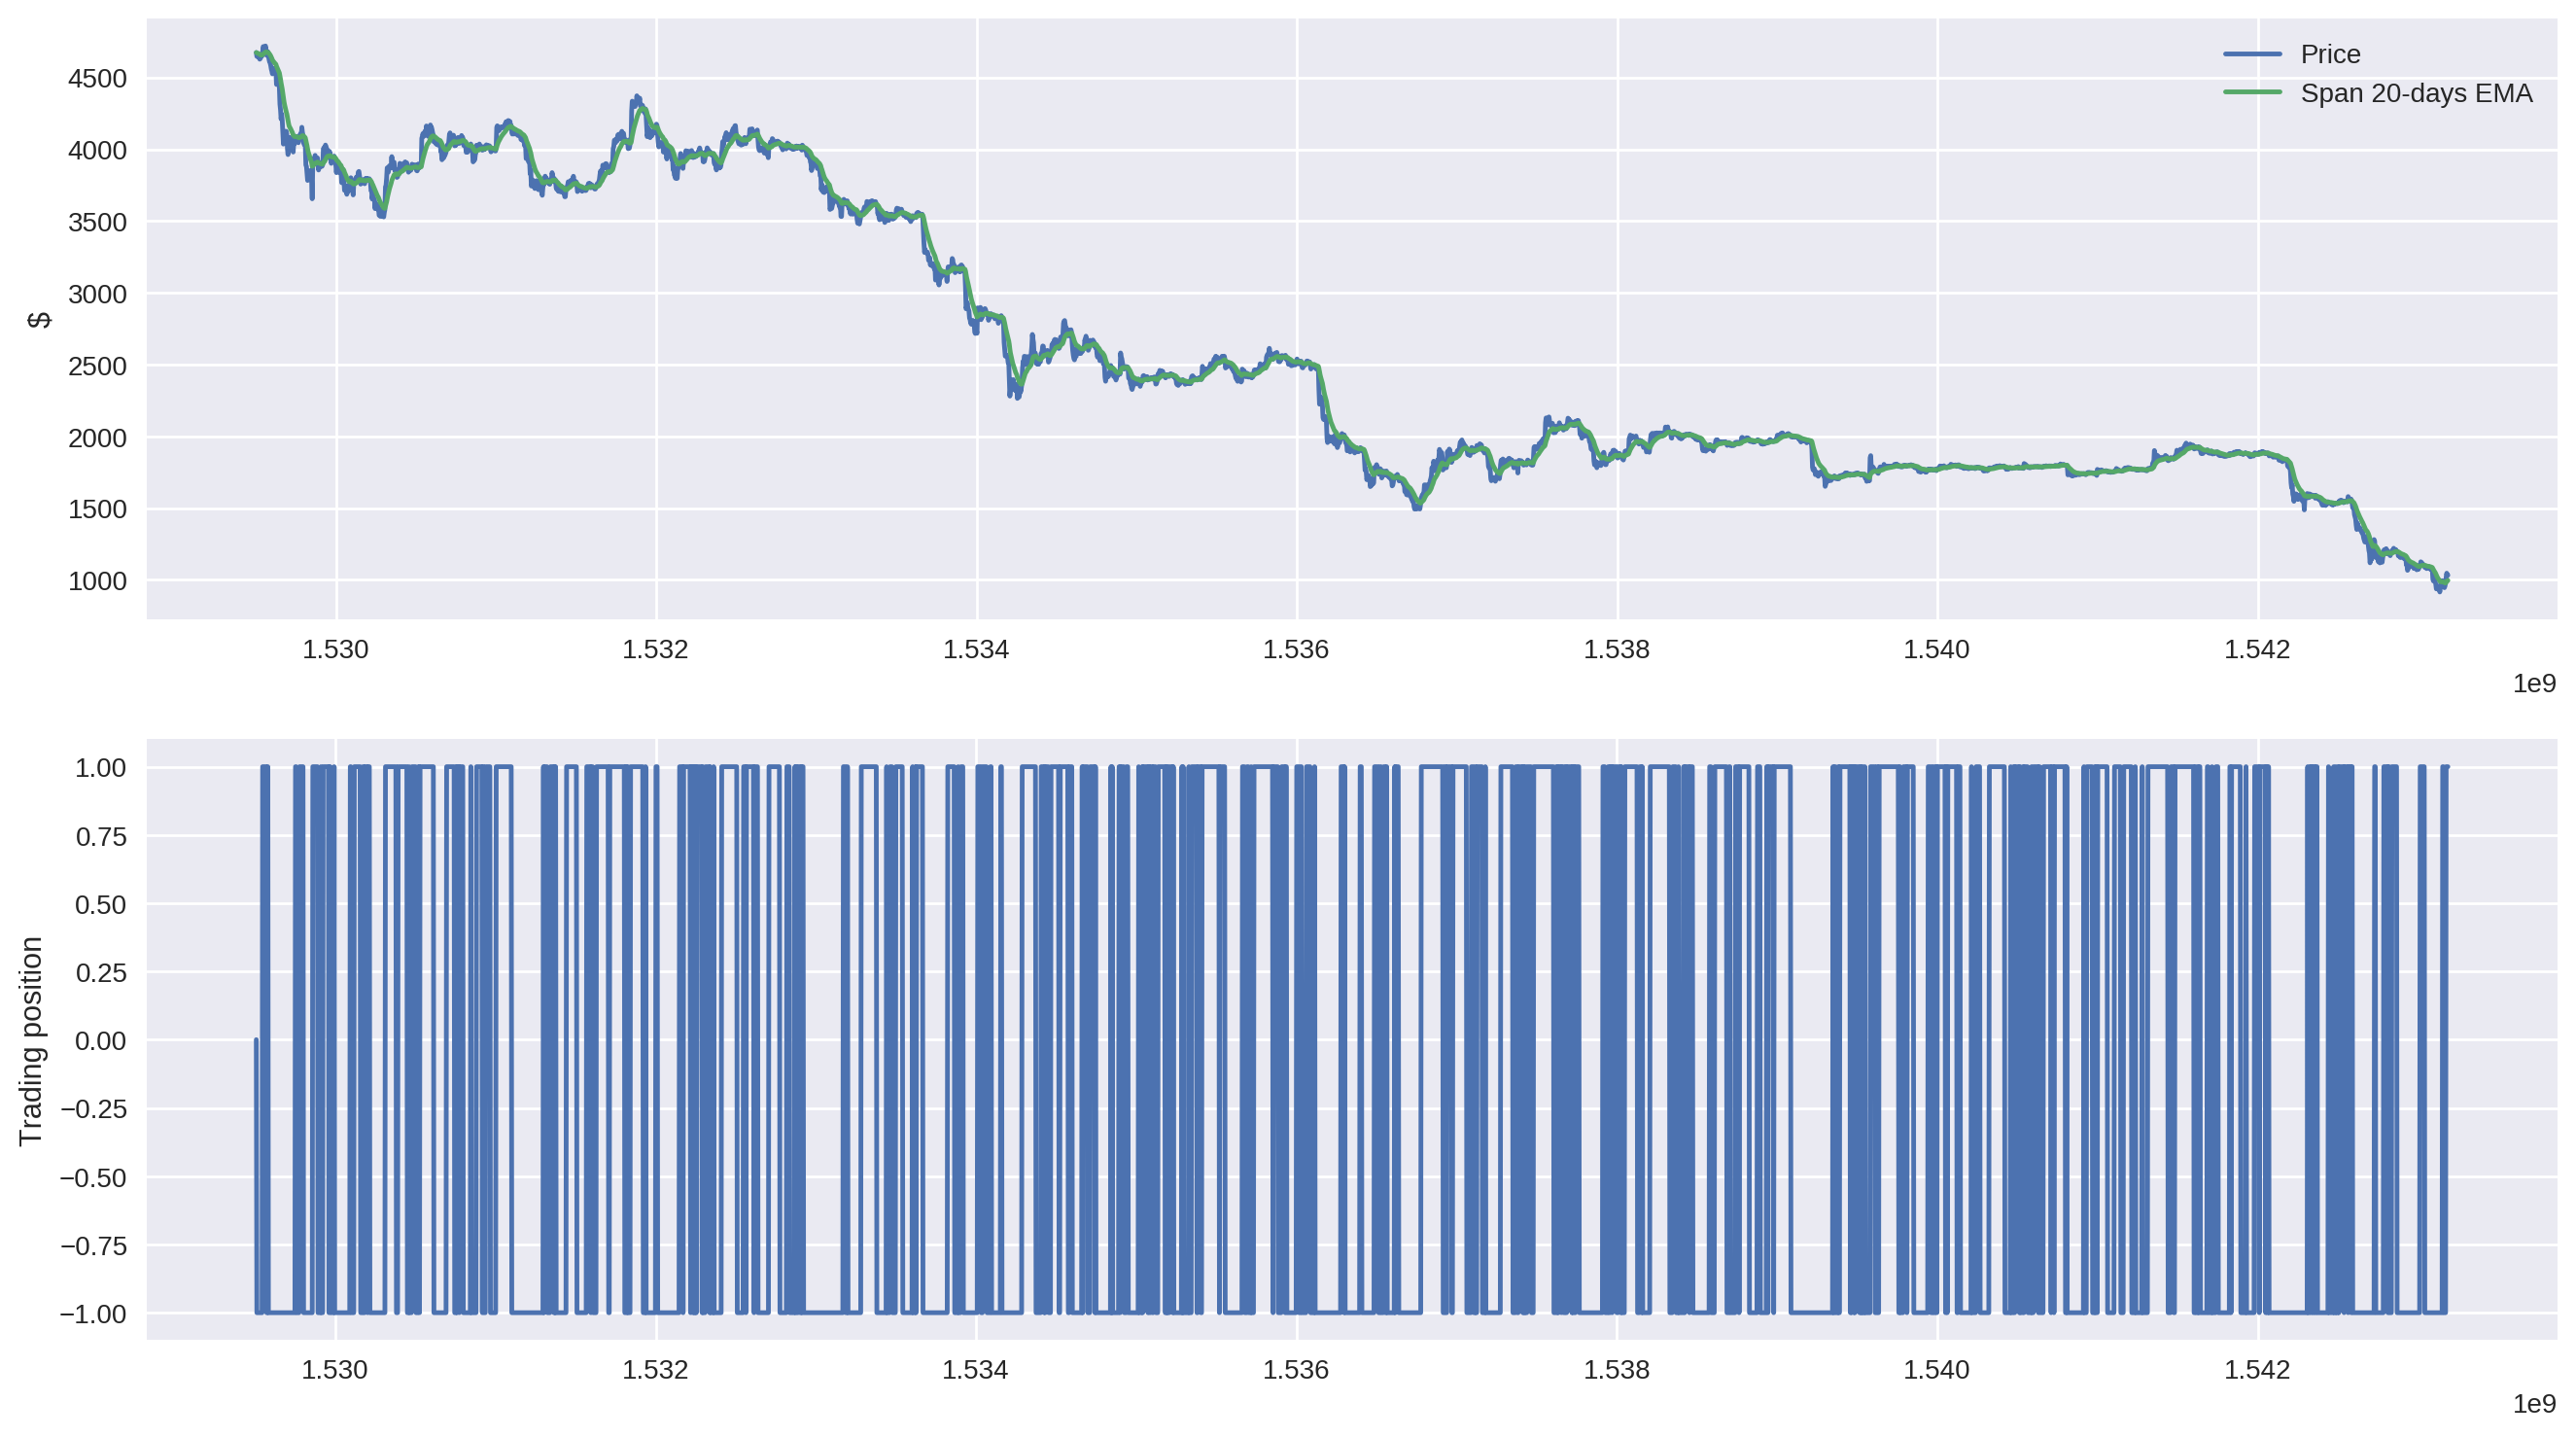

In [73]:
#Let us examine what the timeseries and the respective trading position look like for one of our assets, Microsoft.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(close.loc[start_date:end_date, :].index.astype(np.int64) // 10**9, close.loc[start_date:end_date, 'close'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index.astype(np.int64) // 10**9, ema_short.loc[start_date:end_date, 'close'], label = 'Span 20-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index.astype(np.int64) // 10**9, trading_positions_final.loc[start_date:end_date, 'close'], 
        label='Trading position')

ax2.set_ylabel('Trading position')

In [74]:
# Now that the position our strategy dictates each day has been calculated, the performance of this strategy can be easily estimated.
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations

asset_log_returns = np.log(close).diff()
asset_log_returns.head()

,close
,
2018-06-20 14:00:00+00:00,NaN
2018-06-20 15:00:00+00:00,-0.005751
2018-06-20 16:00:00+00:00,0.002515
2018-06-20 17:00:00+00:00,-0.003096
2018-06-20 18:00:00+00:00,0.002344


In [75]:
# To get all the strategy log-returns for all days, one needs simply to multiply the strategy positions with the asset log-returns.
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,close
,
2018-11-25 19:00:00+00:00,-0.021788
2018-11-25 20:00:00+00:00,0.039751
2018-11-25 21:00:00+00:00,0.027402
2018-11-25 22:00:00+00:00,-0.017050
2018-11-25 23:00:00+00:00,0.003879


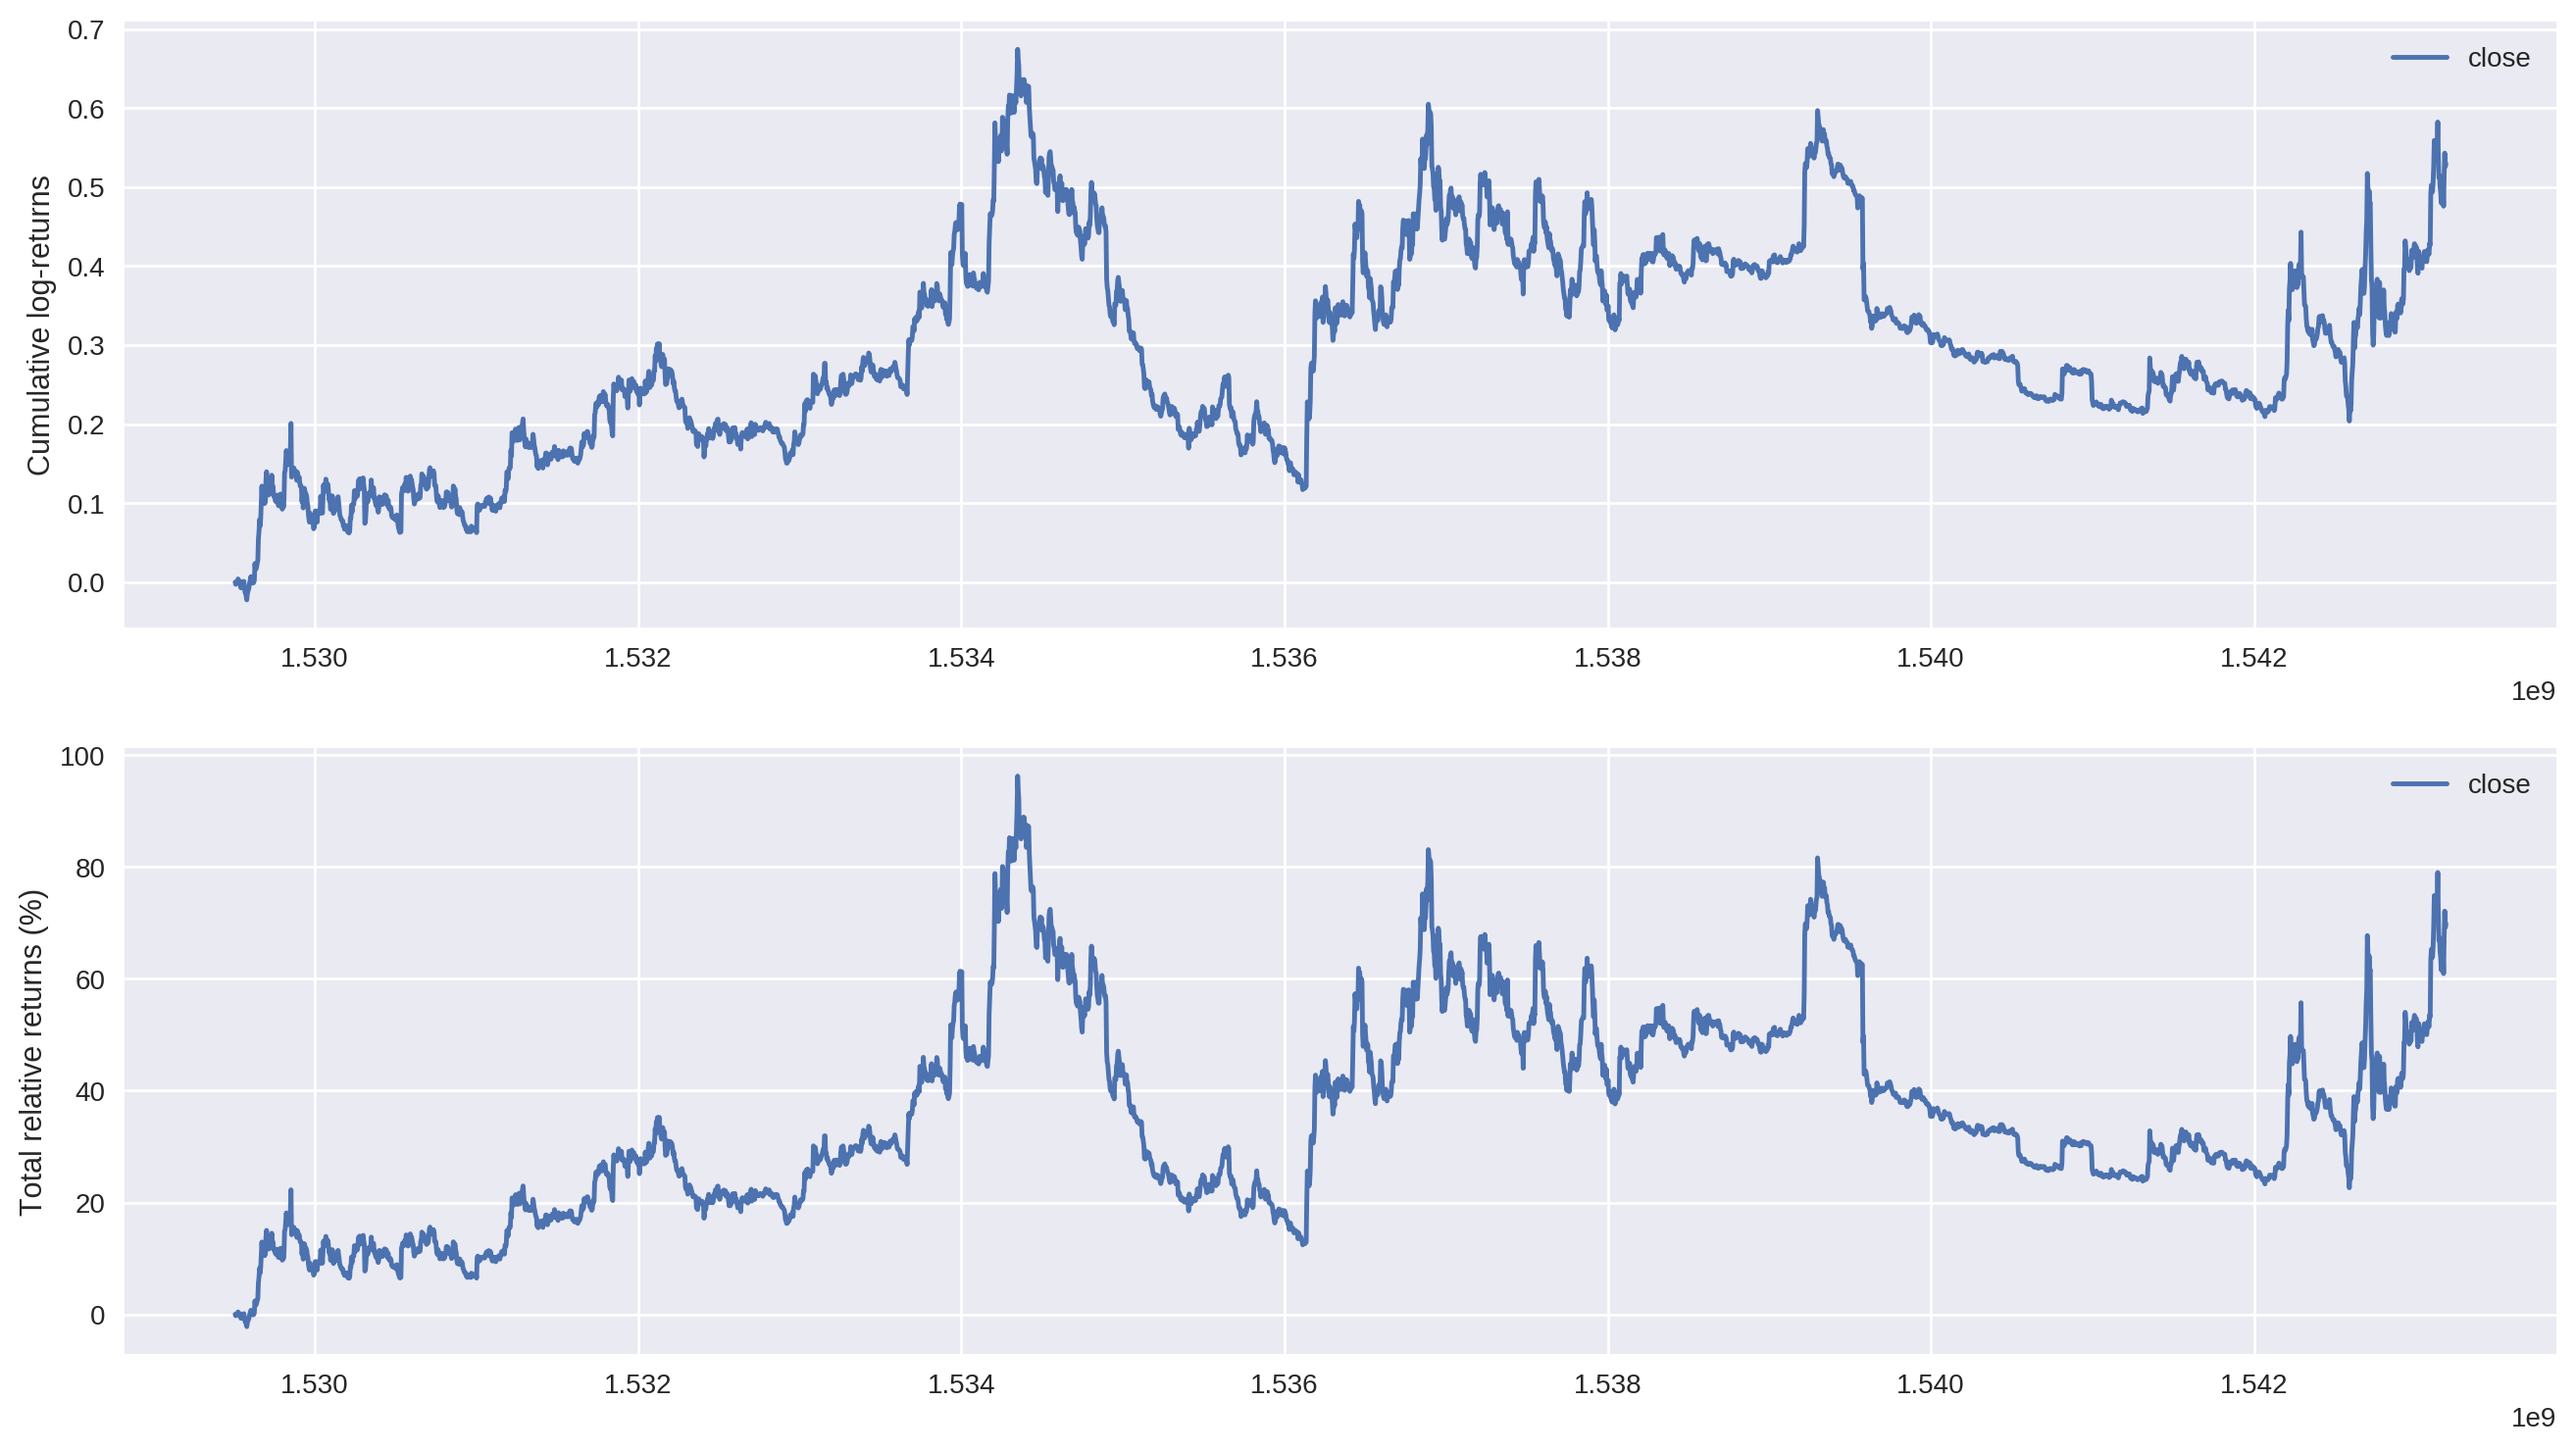

In [76]:
# Let us plot the cumulative log-returns and the cumulative total relative returns of our strategy for each of the assets.

# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index.astype(np.int64) // 10**9, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')


for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index.astype(np.int64) // 10**9, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')


In [77]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)
cum_relative_return_exact.shape[0]

3802

In [78]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    #print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')
    


print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 69.87%


In [79]:
# Moving average trading strategy: 
# First one: taking advantage of the lag between the price and ema series: 
# - When the price timeseries p(t) crosses the EMA timeseries e(t) from below, we will close any existing short position and go long (buy) one unit of the asset.
# - When the price timeseries p(t) crosses the EMA timeseries e(t) from above, we will close any existing long position and go short (sell) one unit of the asset.
#
# Taking the difference between the prices and the EMA timeseries

trading_positions_raw = short_rolling - long_rolling
trading_positions_raw.tail()

,close
,
2018-11-25 19:00:00+00:00,-127.299
2018-11-25 20:00:00+00:00,-124.652
2018-11-25 21:00:00+00:00,-120.389
2018-11-25 22:00:00+00:00,-115.934
2018-11-25 23:00:00+00:00,-109.793


In [80]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/4
trading_positions = trading_positions_raw.apply(np.sign)
trading_positions.tail()

,close
,
2018-11-25 19:00:00+00:00,-1.0
2018-11-25 20:00:00+00:00,-1.0
2018-11-25 21:00:00+00:00,-1.0
2018-11-25 22:00:00+00:00,-1.0
2018-11-25 23:00:00+00:00,-1.0


In [81]:
# One final caveat
# We don't really now the behaviour on the first day, so we shift of one day and assume we traded at the close of the first day
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)

Text(0, 0.5, 'Trading position')

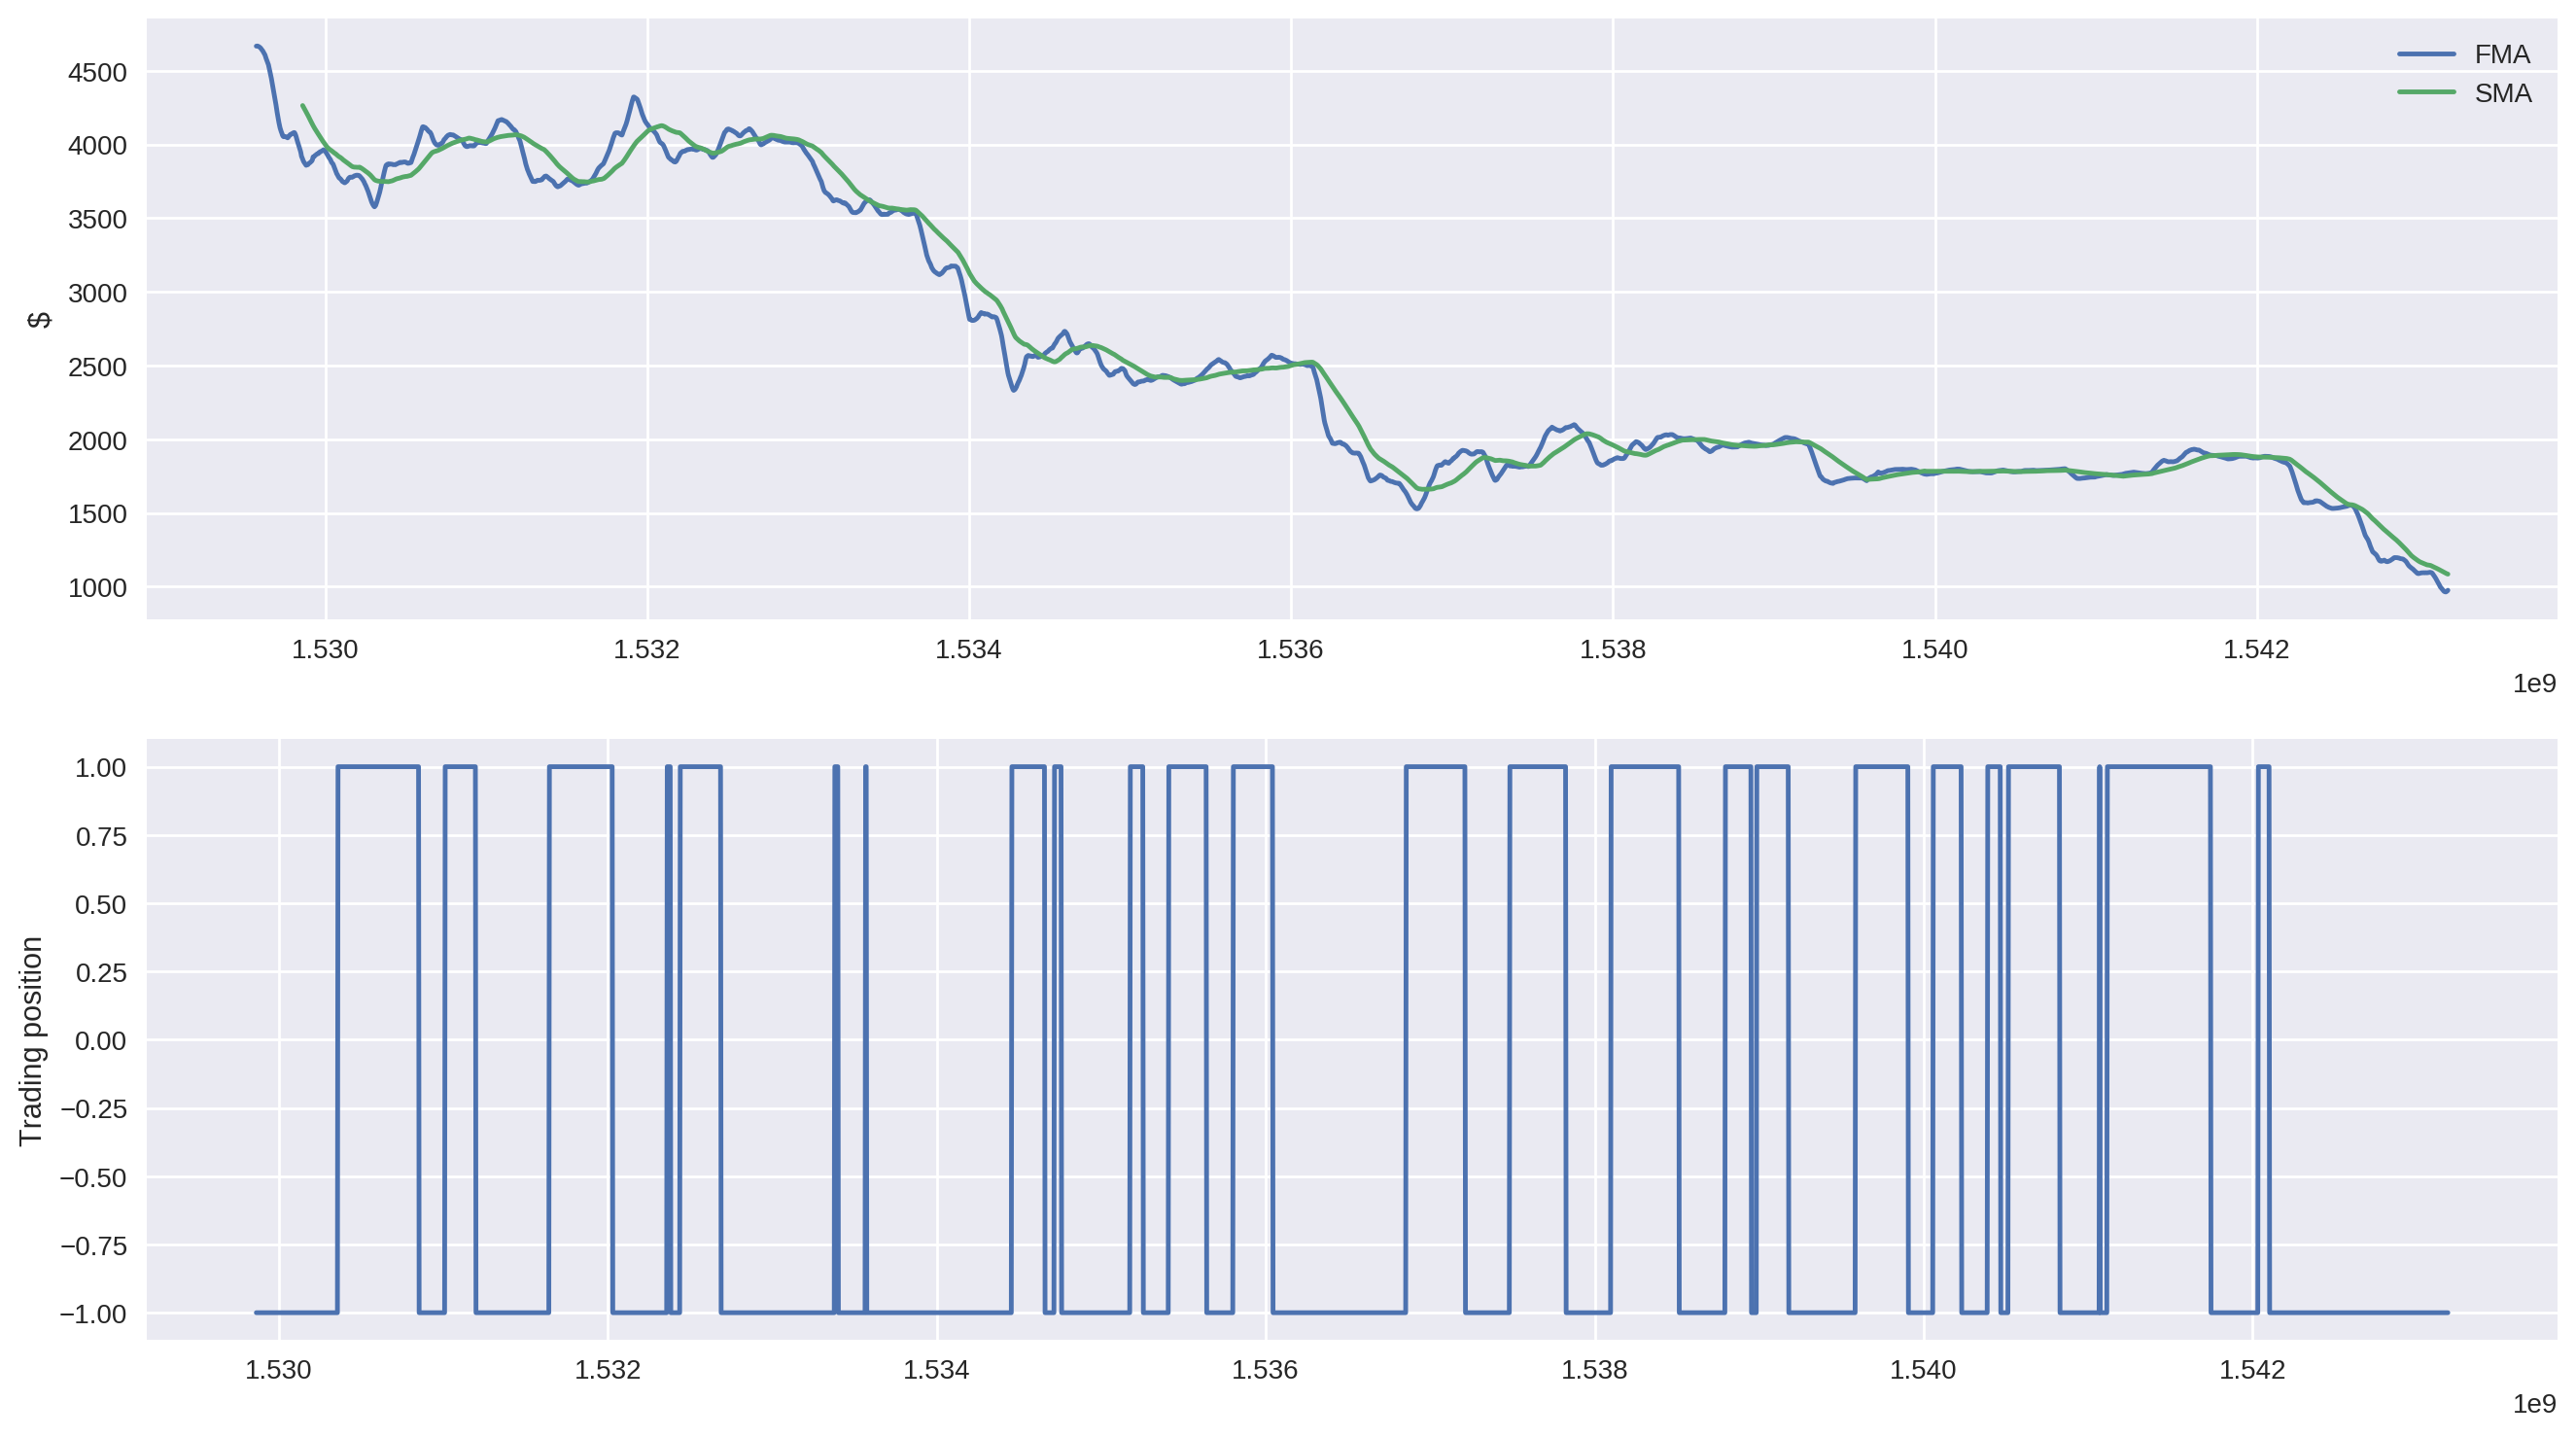

In [82]:
#Let us examine what the timeseries and the respective trading position look like for one of our assets, Microsoft.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(short_rolling.loc[start_date:end_date].index.astype(np.int64) // 10**9, short_rolling.loc[start_date:end_date], label='FMA')
ax1.plot(long_rolling.loc[start_date:end_date].index.astype(np.int64) // 10**9, long_rolling.loc[start_date:end_date], label = 'SMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')

ax2.plot(trading_positions_final.loc[start_date:end_date].index.astype(np.int64) // 10**9, trading_positions_final.loc[start_date:end_date], 
        label='Trading position')

ax2.set_ylabel('Trading position')

In [83]:
# Now that the position our strategy dictates each day has been calculated, the performance of this strategy can be easily estimated.
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations

asset_log_returns = np.log(close).diff()
asset_log_returns

,close
,
2018-06-20 14:00:00+00:00,NaN
2018-06-20 15:00:00+00:00,-0.005751
2018-06-20 16:00:00+00:00,0.002515
2018-06-20 17:00:00+00:00,-0.003096
2018-06-20 18:00:00+00:00,0.002344
...,...
2018-11-25 19:00:00+00:00,0.021788
2018-11-25 20:00:00+00:00,0.039751
2018-11-25 21:00:00+00:00,0.027402


In [85]:
# To get all the strategy log-returns for all days, one needs simply to multiply the strategy positions with the asset log-returns.
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,close
,
2018-11-25 19:00:00+00:00,-0.021788
2018-11-25 20:00:00+00:00,-0.039751
2018-11-25 21:00:00+00:00,-0.027402
2018-11-25 22:00:00+00:00,0.017050
2018-11-25 23:00:00+00:00,-0.003879


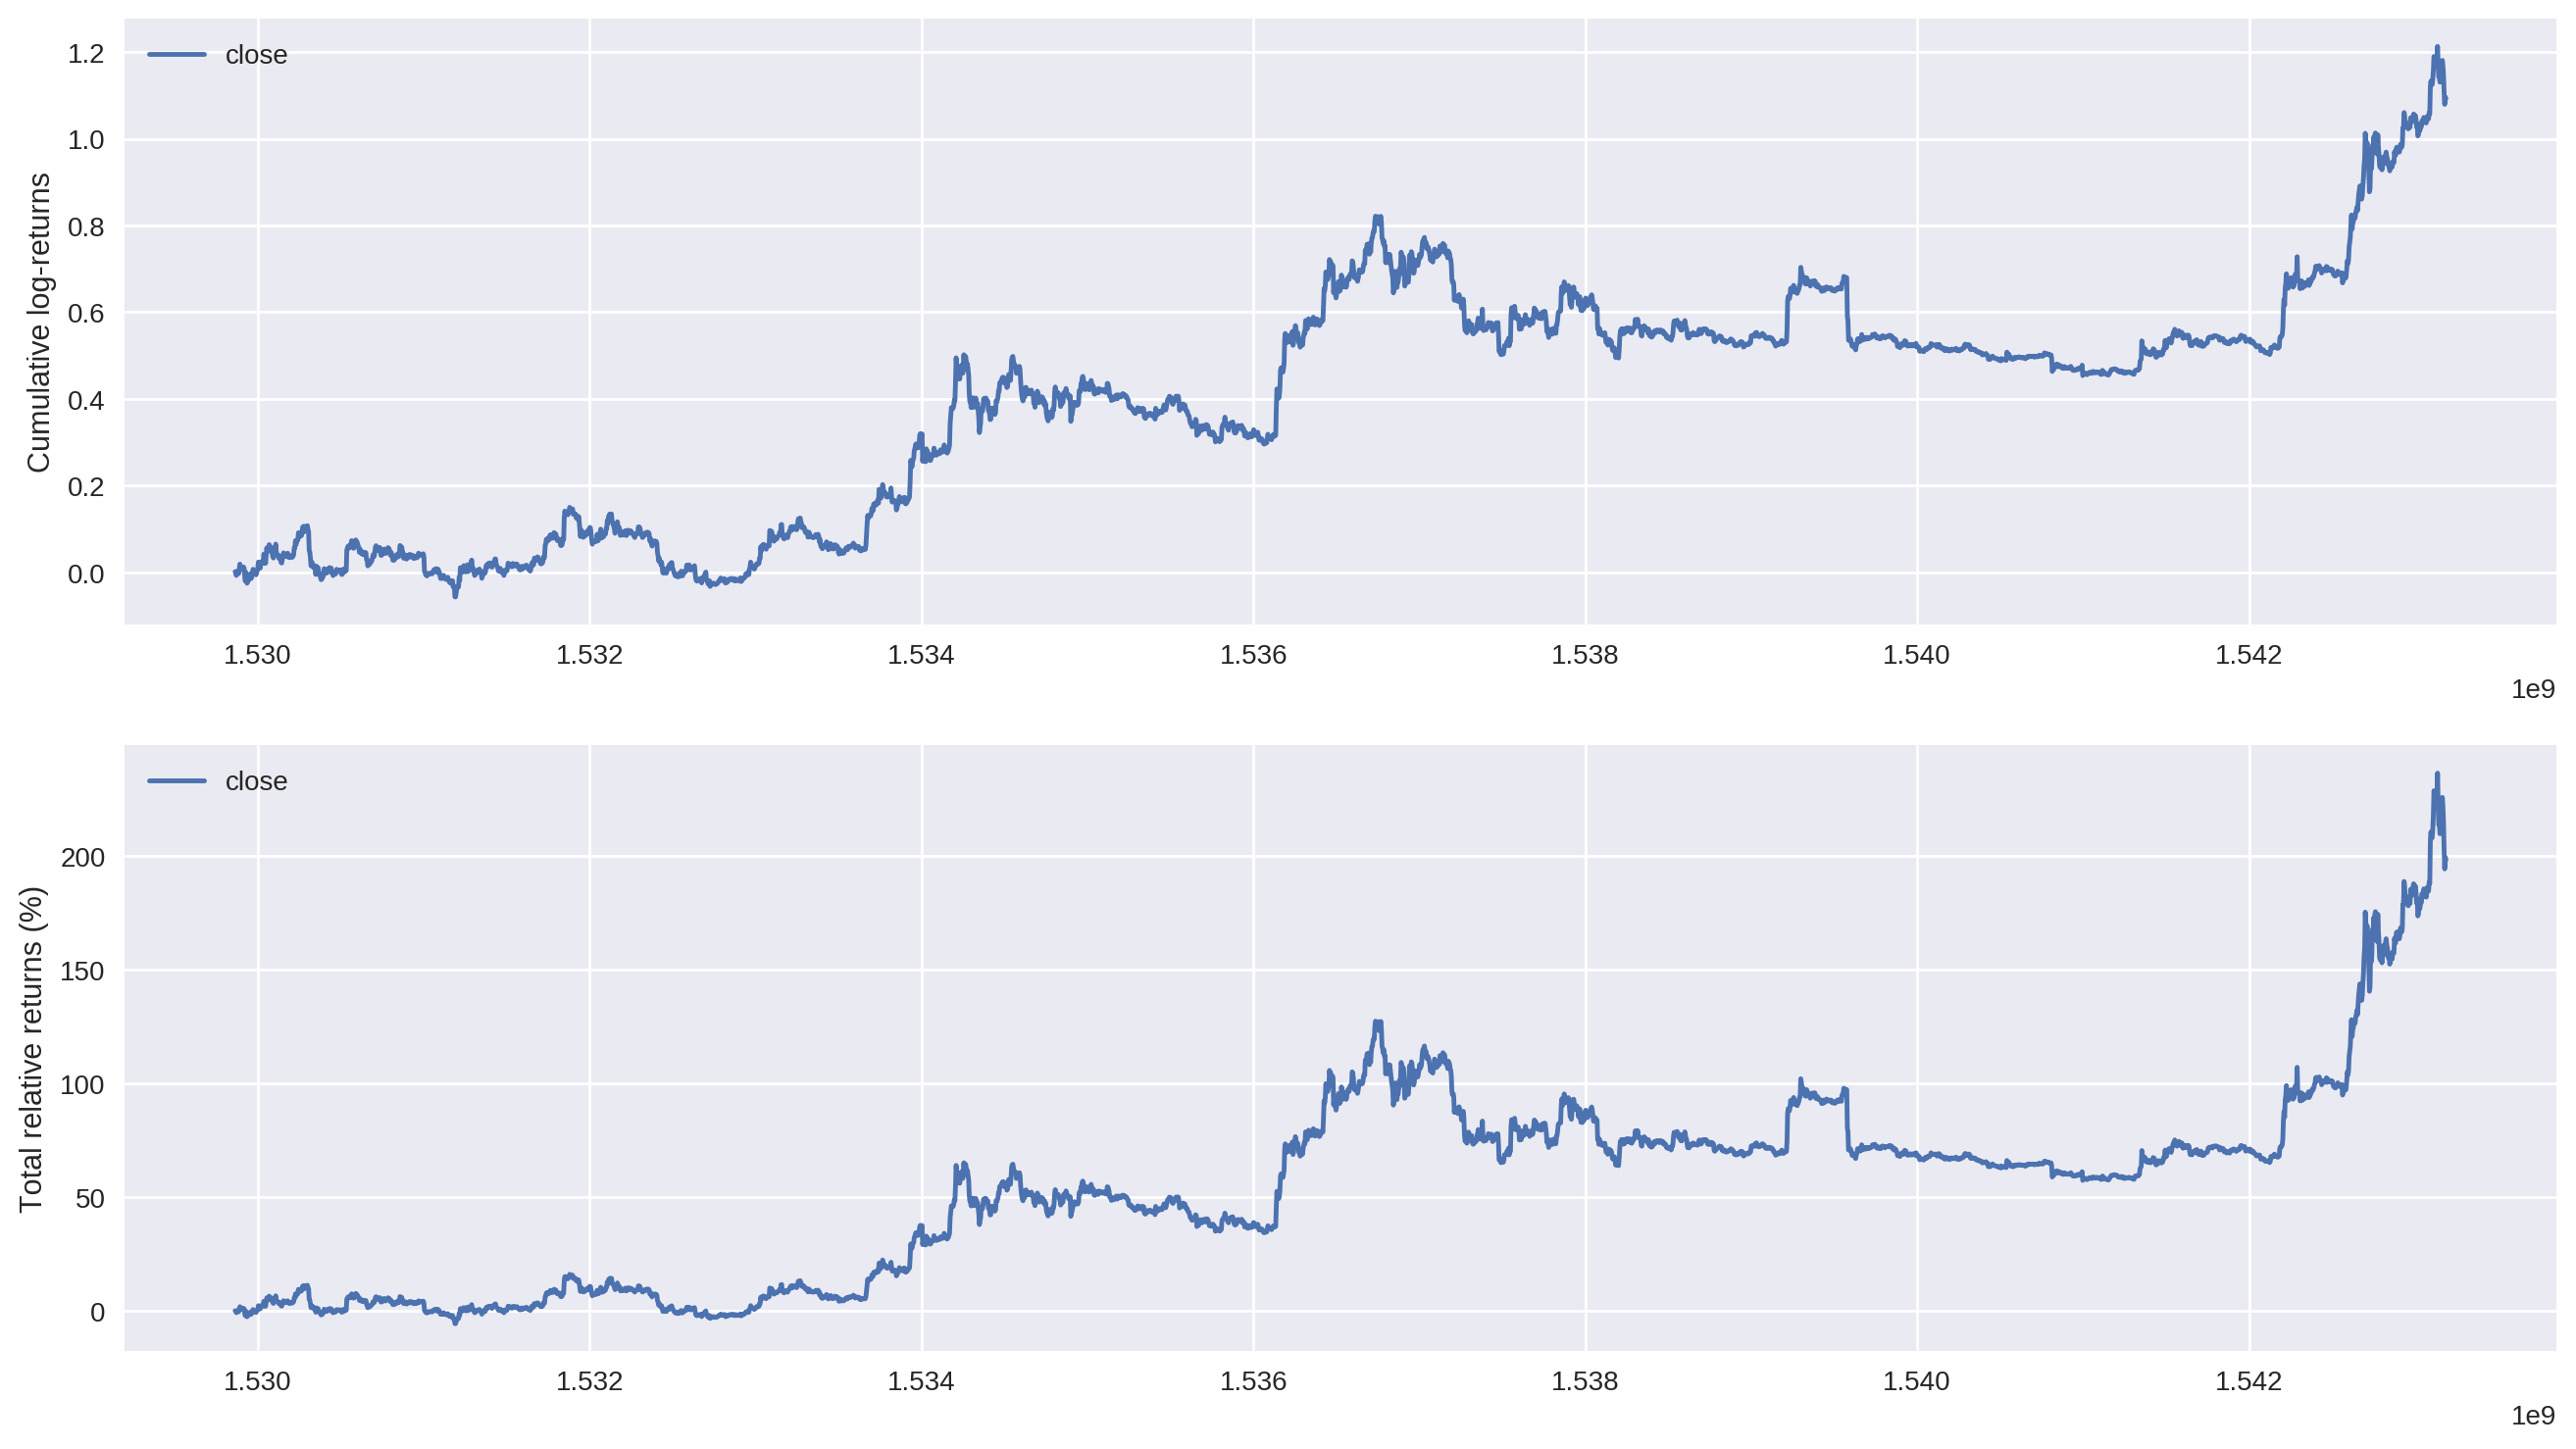

In [86]:
# Let us plot the cumulative log-returns and the cumulative total relative returns of our strategy for each of the assets.

# Get the cumulative log-returns per asset
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index.astype(np.int64) // 10**9, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')


for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index.astype(np.int64) // 10**9, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

In [88]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)
cum_relative_return_exact.shape[0]

3802

In [89]:
print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 198.21%
